http://brandonrose.org/clustering

In [1]:
from Database import db_mongo

import string

In [2]:
db = db_mongo.db_mongo()

df = db.get_text(100000)

df = df.sample(frac=1).reset_index(drop=True)

df = df[:100]

all_text = list()

for item in df["text"]:
    # This does not give a very readable output
    text = item.encode('utf8')
    #print(item)
    #all_text.append(item)
    
    nopunc = [word.replace('\n'," ").replace('\x0c'," ") for word in item if word not in string.punctuation]
       
    
        
    nopunc = ''.join(nopunc)
    all_text.append(nopunc.lower())
    
titles = []

for item in df['class']:
    titles.append(item)

Init DB


In [3]:
titles

['FINANCE',
 'CONSTRUCTION',
 'SALES',
 'PUBLIC-RELATIONS',
 'ARTS',
 'FINANCE',
 'AVIATION',
 'CONSULTANT',
 'FITNESS',
 'CHEF',
 'AUTOMOBILE',
 'AVIATION',
 'BANKING',
 'BANKING',
 'FITNESS',
 'CONSULTANT',
 'AVIATION',
 'ADVOCATE',
 'AGRICULTURE',
 'TEACHER',
 'AVIATION',
 'TEACHER',
 'APPAREL',
 'INFORMATION-TECHNOLOGY',
 'DESIGNER',
 'CONSTRUCTION',
 'DIGITAL-MEDIA',
 'BUSINESS-DEVELOPMENT',
 'CONSTRUCTION',
 'FINANCE',
 'CONSULTANT',
 'CONSULTANT',
 'BPO',
 'PUBLIC-RELATIONS',
 'AVIATION',
 'HR',
 'CONSULTANT',
 'AGRICULTURE',
 'ACCOUNTANT',
 'ACCOUNTANT',
 'BANKING',
 'AGRICULTURE',
 'SALES',
 'INFORMATION-TECHNOLOGY',
 'FINANCE',
 'SALES',
 'HR',
 'ADVOCATE',
 'CONSULTANT',
 'AGRICULTURE',
 'DESIGNER',
 'HEALTHCARE',
 'APPAREL',
 'BANKING',
 'APPAREL',
 'BANKING',
 'ADVOCATE',
 'BPO',
 'FINANCE',
 'FINANCE',
 'HR',
 'DIGITAL-MEDIA',
 'BANKING',
 'DIGITAL-MEDIA',
 'CONSULTANT',
 'FINANCE',
 'SALES',
 'HEALTHCARE',
 'TEACHER',
 'BANKING',
 'HEALTHCARE',
 'FITNESS',
 'TEACHER',
 '

In [4]:
all_text

['experience  finance  july 2008 to october 2015 company name 1 city  state  held various finance and project management related roles including e integrated scheduling e contracts cr bu nee etitn os  ',
 'e provided senior level lead management oversight for all phases of all construction projects  e coordinate and guide contractors material and equipment  e develop costeffective plan and schedule for completion of projects following a logical pattern for utilization of resources  e selected and coordinated work of contractors working on various phases of the project  e monitored the performance of all contractors  e review and approve all architectural and engineering drawings to make sure that all specifications and regulations are being followed  e implemented and managed proper administration of construction contracts  e obtam all necessary permits and licenses  e supervise and mentored assistant managers engineers and support staff  cr venos em ieciml mon zike eee surieatn omim m

In [5]:
import numpy as np
import pandas as pd
import nltk
import re
import os
import codecs
from sklearn import feature_extraction
import mpld3

In [6]:
# load nltk's English stopwords as variable called 'stopwords'
stopwords = nltk.corpus.stopwords.words('english')

In [7]:
print(stopwords[:10])

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]


In [8]:
# load nltk's SnowballStemmer as variabled 'stemmer'
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")

In [9]:

# here I define a tokenizer and stemmer which returns the set of stems in the text that it is passed

def tokenize_and_stem(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    stems = [stemmer.stem(t) for t in filtered_tokens]
    return stems


def tokenize_only(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word.lower() for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    return filtered_tokens

In [10]:
#not super pythonic, no, not at all.
#use extend so it's a big flat list of vocab
totalvocab_stemmed = []
totalvocab_tokenized = []
for i in all_text:
    allwords_stemmed = tokenize_and_stem(i) #for each item in 'synopses', tokenize/stem
    totalvocab_stemmed.extend(allwords_stemmed) #extend the 'totalvocab_stemmed' list
    
    allwords_tokenized = tokenize_only(i)
    totalvocab_tokenized.extend(allwords_tokenized)

In [11]:
vocab_frame = pd.DataFrame({'words': totalvocab_tokenized}, index = totalvocab_stemmed)
print('there are ' + str(vocab_frame.shape[0]) + ' items in vocab_frame')

there are 9527 items in vocab_frame


In [12]:
print(vocab_frame.head())

             words
experi  experience
financ     finance
juli          july
to              to
octob      october


In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

#define vectorizer parameters
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=200000,
                                 min_df=0.2, stop_words='english',
                                 use_idf=True, tokenizer=tokenize_and_stem, ngram_range=(1,3))

%time tfidf_matrix = tfidf_vectorizer.fit_transform(all_text) #fit the vectorizer to synopses

print(tfidf_matrix.shape)

CPU times: user 195 ms, sys: 6.15 ms, total: 201 ms
Wall time: 201 ms
(100, 16)


/home/kguttas/anaconda3/envs/practica/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:386: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'mani', 'meanwhil', 'moreov', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'togeth', 'twelv', 'twenti', 'veri', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [14]:
terms = tfidf_vectorizer.get_feature_names()

In [15]:
from sklearn.metrics.pairwise import cosine_similarity
dist = 1 - cosine_similarity(tfidf_matrix)

In [16]:
print(dist)

[[ 0.00000000e+00  4.41264804e-01  4.61054230e-01 ...  3.24893962e-01
   4.90943169e-01  1.84056214e-01]
 [ 4.41264804e-01  0.00000000e+00  1.00000000e+00 ...  1.41781743e-01
   1.19998872e-01  1.43382144e-01]
 [ 4.61054230e-01  1.00000000e+00 -2.22044605e-16 ...  8.52498894e-01
   1.00000000e+00  7.33136988e-01]
 ...
 [ 3.24893962e-01  1.41781743e-01  8.52498894e-01 ... -2.22044605e-16
   2.47532307e-02  5.11564651e-02]
 [ 4.90943169e-01  1.19998872e-01  1.00000000e+00 ...  2.47532307e-02
   0.00000000e+00  1.17778515e-01]
 [ 1.84056214e-01  1.43382144e-01  7.33136988e-01 ...  5.11564651e-02
   1.17778515e-01  0.00000000e+00]]


In [17]:
from sklearn.cluster import KMeans

num_clusters = 5

km = KMeans(n_clusters=num_clusters)

%time km.fit(tfidf_matrix)

clusters = km.labels_.tolist()

CPU times: user 45.8 ms, sys: 4.29 ms, total: 50.1 ms
Wall time: 62.8 ms


In [18]:
#from sklearn.externals import joblib
import joblib

#uncomment the below to save your model 
#since I've already run my model I am loading from the pickle

joblib.dump(km,  'data/models/doc_cluster.pkl')

km = joblib.load('data/models/doc_cluster.pkl')
clusters = km.labels_.tolist()

In [19]:
#films = { 'title': titles, 'rank': ranks, 'synopsis': synopses, 'cluster': clusters, 'genre': genres }

frame = pd.DataFrame(all_text, index = [clusters] )

In [20]:
import os  # for os.path.basename

import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn.manifold import MDS

#MDS()

# convert two components as we're plotting points in a two-dimensional plane
# "precomputed" because we provide a distance matrix
# we will also specify `random_state` so the plot is reproducible.
mds = MDS(n_components=2, 
          dissimilarity="precomputed", 
          random_state=1)

pos = mds.fit_transform(dist)  # shape (n_components, n_samples)

xs, ys = pos[:, 0], pos[:, 1]
print(xs)
print(ys)

[-1.92438328e-01  2.54873294e-01 -6.15816931e-01  6.08243750e-01
  6.98957196e-01  2.22614046e-01  2.41373484e-01  2.55593891e-01
  2.41373484e-01 -6.35865852e-02 -7.00578383e-01  5.49047955e-01
 -5.36723316e-01  2.02471539e-01 -1.00276901e-01  2.39813981e-01
  2.79437658e-01 -5.95142049e-01 -2.21986237e-01  2.98236742e-01
  2.79272383e-02 -4.75187703e-01  6.49383863e-03 -4.77712894e-01
 -4.47426570e-01 -4.38980681e-01  6.56689893e-01  1.72512051e-02
 -5.19784467e-03  2.50389763e-02 -2.23292282e-01  2.95979246e-01
  5.13655330e-01  1.07135825e-01  2.67604913e-01  2.22535376e-01
  2.86229483e-01 -5.95142032e-01 -6.30642375e-01  2.31801884e-01
  2.15014457e-01 -5.68468976e-01 -6.39623101e-02  2.61453726e-01
  3.90823097e-01  1.90880686e-02  2.45067811e-01 -4.75445372e-01
 -1.63440247e-01  2.42869148e-01  1.89967448e-01 -5.10833633e-02
  1.00078506e-01 -1.78962067e-01  1.54643235e-01 -5.95142038e-01
  3.12938913e-01 -7.16222341e-04  8.29719314e-01 -5.95142049e-01
  1.62798327e-01 -5.80226

In [21]:
#set up colors per clusters using a dict
cluster_colors = {0: '#1b9e77', 1: '#d95f02', 2: '#7570b3', 3: '#e7298a', 4: '#66a61e'}

#set up cluster names using a dict
cluster_names = {0: 'Family, home, war', 
                 1: 'Police, killed, murders', 
                 2: 'Father, New York, brothers', 
                 3: 'Dance, singing, love', 
                 4: 'Killed, soldiers, captain'}

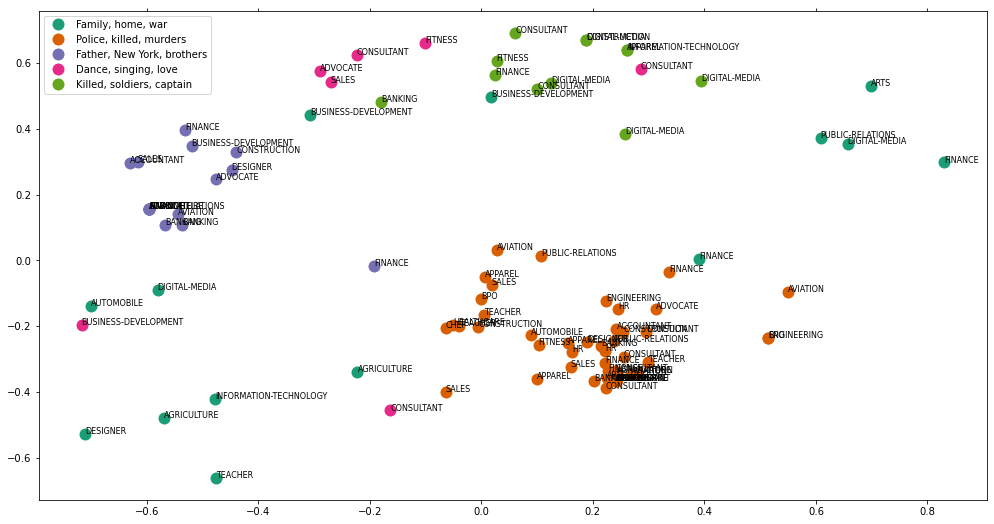

In [22]:
#some ipython magic to show the matplotlib plots inline
%matplotlib inline 

#create data frame that has the result of the MDS plus the cluster numbers and titles
df = pd.DataFrame(dict(x=xs, y=ys, label=clusters, title=titles)) 

#group by cluster
groups = df.groupby('label')


# set up plot
fig, ax = plt.subplots(figsize=(17, 9)) # set size
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

#iterate through groups to layer the plot
#note that I use the cluster_name and cluster_color dicts with the 'name' lookup to return the appropriate color/label
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=12, 
            label=cluster_names[name], color=cluster_colors[name], 
            mec='none')
    ax.set_aspect('auto')
    ax.tick_params(\
        axis= 'x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelbottom='off')
    ax.tick_params(\
        axis= 'y',         # changes apply to the y-axis
        which='both',      # both major and minor ticks are affected
        left='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelleft='off')
    
ax.legend(numpoints=1)  #show legend with only 1 point

#add label in x,y position with the label as the film title
for i in range(len(df)):
    ax.text(df.loc[i]['x'], df.loc[i]['y'], df.loc[i]['title'], size=8)  

    
    
plt.show() #show the plot

#uncomment the below to save the plot if need be
#plt.savefig('clusters_small_noaxes.png', dpi=200)

In [23]:
plt.close()

In [24]:
#define custom toolbar location
class TopToolbar(mpld3.plugins.PluginBase):
    """Plugin for moving toolbar to top of figure"""

    JAVASCRIPT = """
    mpld3.register_plugin("toptoolbar", TopToolbar);
    TopToolbar.prototype = Object.create(mpld3.Plugin.prototype);
    TopToolbar.prototype.constructor = TopToolbar;
    function TopToolbar(fig, props){
        mpld3.Plugin.call(this, fig, props);
    };

    TopToolbar.prototype.draw = function(){
      // the toolbar svg doesn't exist
      // yet, so first draw it
      this.fig.toolbar.draw();

      // then change the y position to be
      // at the top of the figure
      this.fig.toolbar.toolbar.attr("x", 150);
      this.fig.toolbar.toolbar.attr("y", 400);

      // then remove the draw function,
      // so that it is not called again
      this.fig.toolbar.draw = function() {}
    }
    """
    def __init__(self):
        self.dict_ = {"type": "toptoolbar"}

In [25]:
#create data frame that has the result of the MDS plus the cluster numbers and titles
df = pd.DataFrame(dict(x=xs, y=ys, label=clusters, title=titles)) 

#group by cluster
groups = df.groupby('label')

#define custom css to format the font and to remove the axis labeling
css = """
text.mpld3-text, div.mpld3-tooltip {
  font-family:Arial, Helvetica, sans-serif;
}

g.mpld3-xaxis, g.mpld3-yaxis {
display: none; }

svg.mpld3-figure {
margin-left: -200px;}
"""

# Plot 
fig, ax = plt.subplots(figsize=(14,6)) #set plot size
ax.margins(0.03) # Optional, just adds 5% padding to the autoscaling

#iterate through groups to layer the plot
#note that I use the cluster_name and cluster_color dicts with the 'name' lookup to return the appropriate color/label
for name, group in groups:
    points = ax.plot(group.x, group.y, marker='o', linestyle='', ms=18, 
                     label=cluster_names[name], mec='none', 
                     color=cluster_colors[name])
    ax.set_aspect('auto')
    labels = [i for i in group.title]
    
    #set tooltip using points, labels and the already defined 'css'
    tooltip = mpld3.plugins.PointHTMLTooltip(points[0], labels,
                                       voffset=10, hoffset=10, css=css)
    #connect tooltip to fig
    mpld3.plugins.connect(fig, tooltip, TopToolbar())    
    
    #set tick marks as blank
    ax.axes.get_xaxis().set_ticks([])
    ax.axes.get_yaxis().set_ticks([])
    
    #set axis as blank
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)

    
ax.legend(numpoints=1) #show legend with only one dot

mpld3.display() #show the plot

#uncomment the below to export to html
#html = mpld3.fig_to_html(fig)
#print(html)

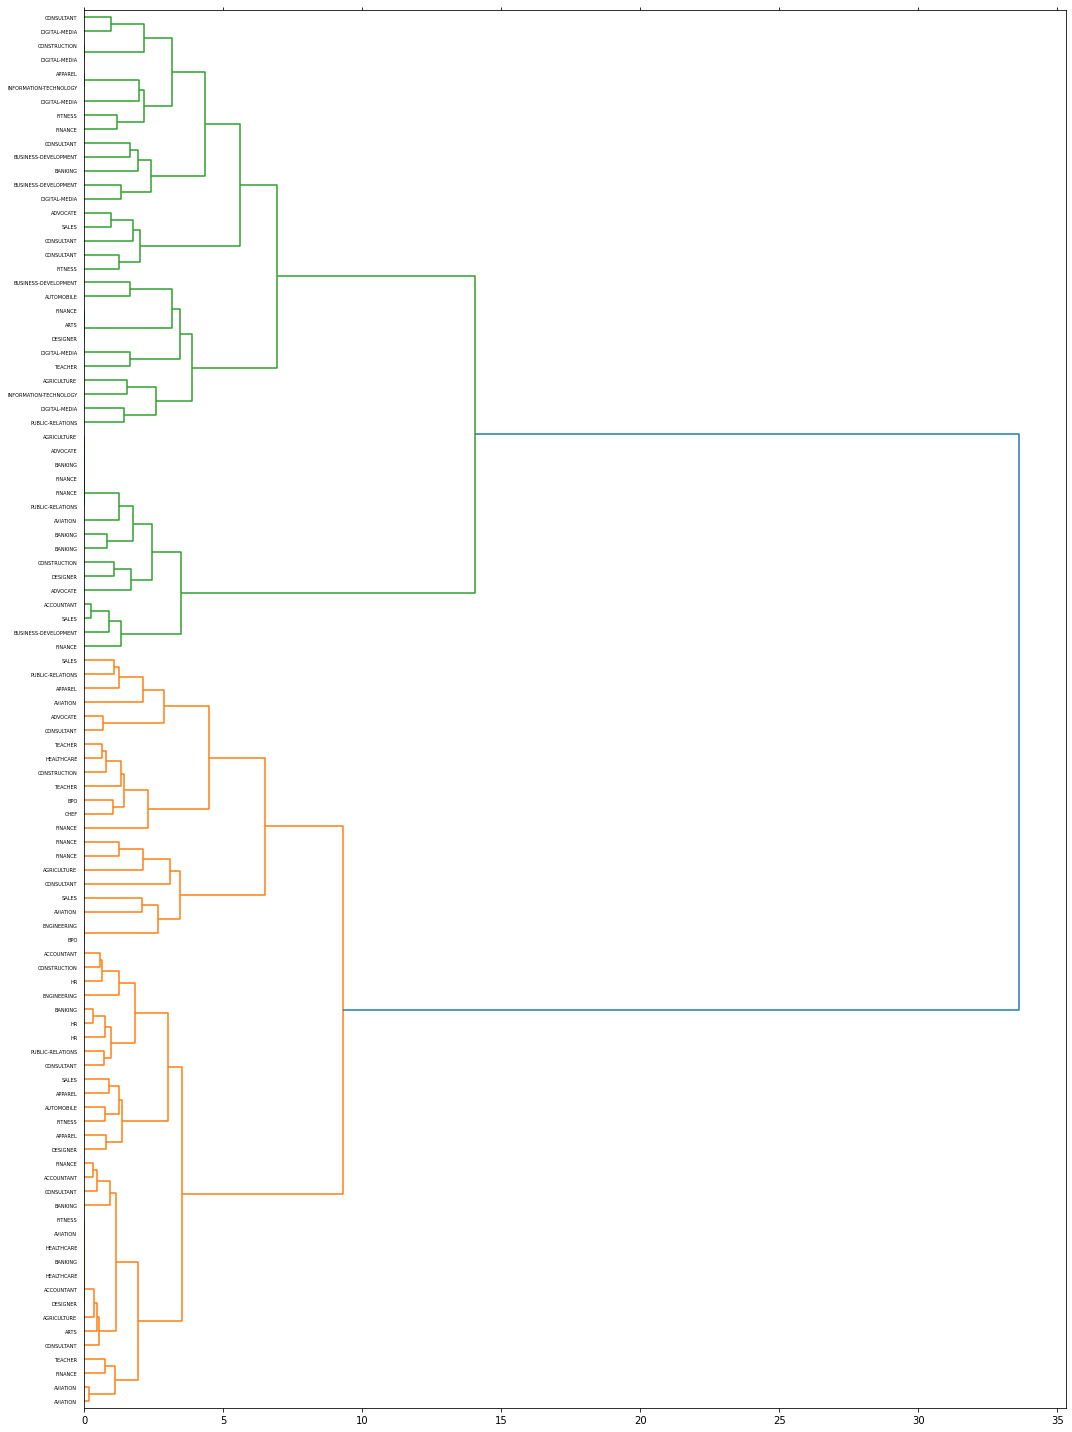

In [26]:
from scipy.cluster.hierarchy import ward, dendrogram

linkage_matrix = ward(dist) #define the linkage_matrix using ward clustering pre-computed distances

fig, ax = plt.subplots(figsize=(15, 20)) # set size
ax = dendrogram(linkage_matrix, orientation="right", labels=titles);

plt.tick_params(\
    axis= 'x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off')

plt.tight_layout() #show plot with tight layout

#uncomment below to save figure
plt.savefig('ward_clusters.png', dpi=200) #save figure as ward_clusters

In [27]:
#strip any proper names from a text...unfortunately right now this is yanking the first word from a sentence too.
import string
def strip_proppers(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent) if word.islower()]
    return "".join([" "+i if not i.startswith("'") and i not in string.punctuation else i for i in tokens]).strip()

In [28]:
#strip any proper nouns (NNP) or plural proper nouns (NNPS) from a text
from nltk.tag import pos_tag

def strip_proppers_POS(text):
    tagged = pos_tag(text.split()) #use NLTK's part of speech tagger
    non_propernouns = [word for word,pos in tagged if pos != 'NNP' and pos != 'NNPS']
    return non_propernouns

In [32]:
from gensim import corpora, models, similarities 

#remove proper names
%time preprocess = [strip_proppers(doc) for doc in df]

#tokenize
%time tokenized_text = [tokenize_and_stem(text) for text in preprocess]

#remove stop words
%time texts = [[word for word in text if word not in stopwords] for text in tokenized_text]

CPU times: user 363 µs, sys: 81 µs, total: 444 µs
Wall time: 449 µs
CPU times: user 507 µs, sys: 112 µs, total: 619 µs
Wall time: 624 µs
CPU times: user 9 µs, sys: 2 µs, total: 11 µs
Wall time: 12.9 µs


In [33]:
#create a Gensim dictionary from the texts
dictionary = corpora.Dictionary(texts)

#remove extremes (similar to the min/max df step used when creating the tf-idf matrix)
dictionary.filter_extremes(no_below=1, no_above=0.8)

#convert the dictionary to a bag of words corpus for reference
corpus = [dictionary.doc2bow(text) for text in texts]

In [34]:
%time lda = models.LdaModel(corpus, num_topics=5, id2word=dictionary, update_every=5, chunksize=10000, passes=100)

CPU times: user 111 ms, sys: 0 ns, total: 111 ms
Wall time: 118 ms


In [35]:
lda.show_topics()

[(0, '0.333*"x" + 0.333*"label" + 0.333*"titl"'),
 (1, '0.750*"x" + 0.125*"label" + 0.125*"titl"'),
 (2, '0.333*"x" + 0.333*"label" + 0.333*"titl"'),
 (3, '0.750*"titl" + 0.125*"x" + 0.125*"label"'),
 (4, '0.750*"label" + 0.125*"x" + 0.125*"titl"')]

In [36]:
topics_matrix = lda.show_topics(formatted=False, num_words=20)
topics_matrix = np.array(topics_matrix)

topic_words = topics_matrix[:,1]
for i in topic_words:
    print([str(word) for word in i])
    print()

["('x', 0.33333334)", "('label', 0.33333334)", "('titl', 0.33333334)"]

["('x', 0.749867)", "('label', 0.12506646)", "('titl', 0.12506646)"]

["('x', 0.33333334)", "('label', 0.33333334)", "('titl', 0.33333334)"]

["('titl', 0.7498671)", "('x', 0.12506647)", "('label', 0.12506647)"]

["('label', 0.749867)", "('x', 0.12506647)", "('titl', 0.12506647)"]



/home/kguttas/anaconda3/envs/practica/lib/python3.7/site-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  
